In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pingouin as pg
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

In [2]:
datapath = '../../csv/ptm_thresholds.csv'
data = pd.read_csv(datapath)

In [3]:
# function
def predicted_contrast(parameters, Ne, d):
    r = parameters[0]
    beta = parameters[1]
    Na = parameters[2]
    Nm = parameters[3]
    Am = parameters[4]
    Af = parameters[5]
    Aa = parameters[6]

    x = 1 / (d ** 2) - (Am * Nm) ** 2
    if x < 0:
        x = 0.01

    log_pContrast = 1 / (2 * r) * np.log((1 + (Am * Nm) ** 2) * (Af * Ne) ** (2 * r) + (Aa * Na) ** 2) - \
                    1 / (2 * r) * np.log(x) - np.log(beta)

    return log_pContrast

In [4]:
# get predictions

Ne = np.exp(np.linspace(np.log(0.005), np.log(0.21), 99))
Ne = np.insert(Ne, 0, 0)
d = np.array([1.089, 1.634])

paramsfit1 = np.array([2.6383, 1.0132, 0.0022, 0.6058, 1.0000, 1.0000, 1.0000])
paramsfit2 = np.array([2.6383, 1.0132, 0.0022, 0.6058, 1.0000, 1.2038, 1.6140])

ypredict11 = np.log10(np.exp(predicted_contrast(paramsfit1, Ne, d[0])) * 100) # CON 70
ypredict21 = np.log10(np.exp(predicted_contrast(paramsfit2, Ne, d[0])) * 100) # SCZ 70


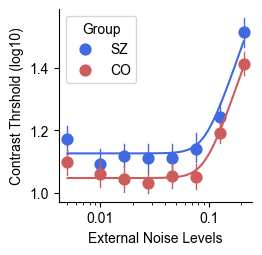

In [5]:
# plot ptm

f = plt.figure()
f.set_size_inches(2.5,2.5)
colors = ['royalblue', 'indianred']

doi = data[data['plevel']==70]

sns.pointplot(data=doi, x='noise', y='threshold', hue='group', errorbar=('ci', 68), linestyle='none', palette=colors, 
              native_scale=True, log_scale=(10, None), err_kws={'linewidth': 1})
plt.xlabel('External Noise Levels')
plt.ylabel('Contrast Thrshold (log10)', fontsize=10)
plt.xticks([0.01, 0.1], ['0.01', '0.1'])
plt.legend(title='Group')

Ne[0] = 0.005
plt.plot(Ne, ypredict11,  color=colors[1])  
plt.plot(Ne, ypredict21,  color=colors[0]) 

sns.despine()

plt.savefig('ptm.pdf', dpi=300, transparent=True, bbox_inches="tight")

In [6]:
pg.mixed_anova(data=doi, dv='threshold', within='noise', subject='sub', between='group', correction='auto')

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,group,0.554787,1,55,0.554787,2.644993,1.095933e-01,NaN,0.045884,NaN,NaN,NaN,NaN
1,noise,7.104719,7,385,1.014960,37.579959,4.942465e-40,5.872720e-31,0.405919,0.745969,False,0.36665,0.001724
2,Interaction,0.050900,7,385,0.007271,0.269234,9.655640e-01,NaN,0.004871,NaN,NaN,NaN,NaN
